In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기 : {} 테스트 세트의 크키 : {}".format(
    X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개 변수의 각 조합에 대해 svc 를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 svc를 평가합니다.
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수:" , best_parameters)

훈련 세트의 크기 : 112 테스트 세트의 크키 : 38
최고 점수 : 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


C:\Users\axzsw\.conda\envs\data\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
C:\Users\axzsw\.conda\envs\data\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


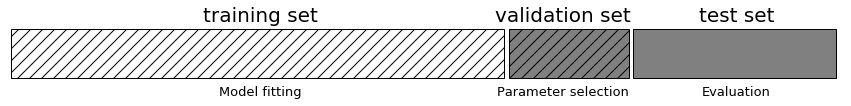

In [2]:
import mglearn

mglearn.plots.plot_threefold_split()

In [3]:
from sklearn.svm import SVC
#데이터를 훈련 + 검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("훈련 세트의 크기: {} 검증 세트의 크기 : {} 테스트 세트의 크기 : {}"
      "\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개 변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        #검증 세트로 SVC를 평가합니다.
        score = svm.score(X_valid, y_valid)

        #점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

#훈련 세트와 검증 세트를 합쳐 모델을 다시 만든후
#테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test,y_test)
print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

훈련 세트의 크기: 84 검증 세트의 크기 : 28 테스트 세트의 크기 : 38

검증 세트에서 최고 점수 : 0.96
최적 매개변수 :  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수 : 0.92


In [4]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개 변소의 각 조합에 대해 svc를 훈련시킵니다.
        svm = SVC(gamma=gamma, C=C)
        #교차 검증을 적용합니다.
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        #교차 검증 정확도의 평균을 계산
        score =np.mean(scores)
        #점수가 더 높으면 매개변수와 함께 기록합니다.
        if score> best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

#훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

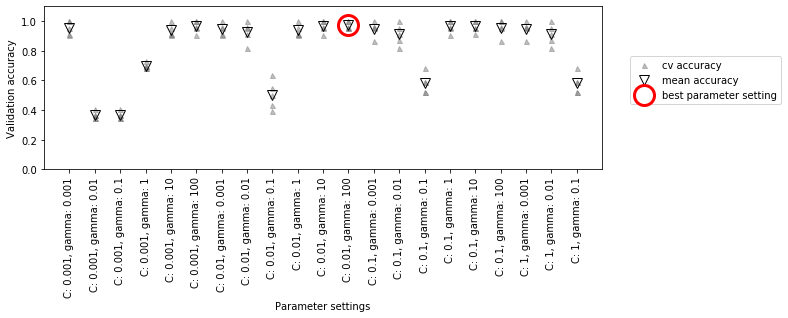

In [5]:
mglearn.plots.plot_cross_val_selection()

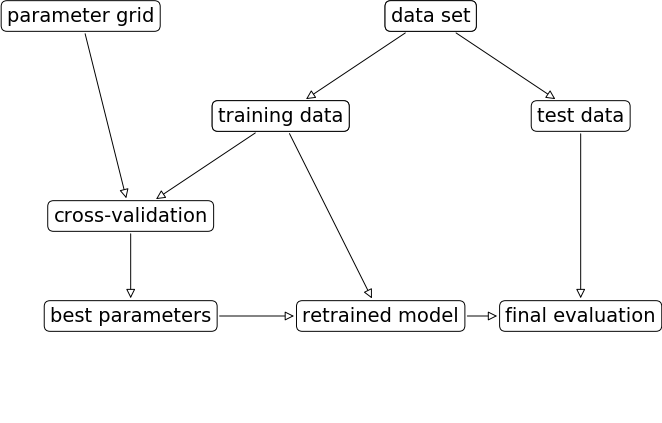

In [6]:
mglearn.plots.plot_grid_search_overview()

In [ ]:
param_grid = {'C':[0.001,0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001,0.01,0.1, 1, 10, 100]}

print("매개변수 그리드:\n", param_grid)

In [8]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [10]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [11]:
print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_test,y_test)))

테스트 세트 점수 : 0.97


In [12]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))


최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
